# Installation

In [ ]:
pip install geopandas

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Loading Geospatial Data

## Loading a Shapefile

- List of Shapes: <br>
https://www.naturalearthdata.com/downloads/110m-cultural-vectors/

In [3]:
# Load a shapefile (change the file path to your data)
gdf = gpd.read_file("ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

## Loading GeoJSON Data

In [ ]:
# Load a GeoJSON file
gdf = gpd.read_file("path_to_file.geojson")

Once the data is loaded, it’s stored as a **GeoDataFrame**. You can inspect the data like a regular pandas DataFrame:

In [ ]:
print(gdf.head())

# Visualizing Geospatial Data

## Basic Plotting

<Axes: >

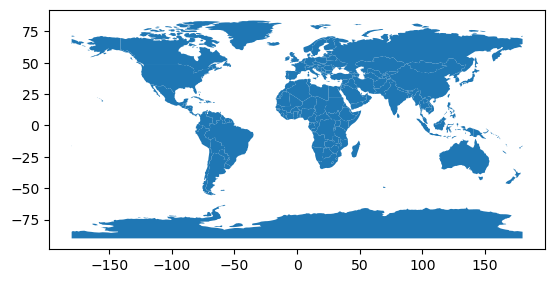

In [4]:
gdf.plot()

## Customizing Plots
colors, boundaries,cmap, or transparency,...

<Axes: >

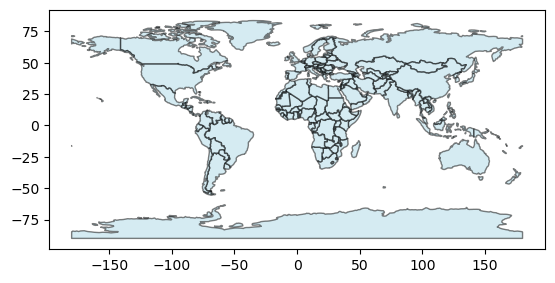

In [11]:
# Custom plot with color and transparency
gdf.plot(color='lightblue', edgecolor='black', alpha=0.5)

## Adding Multiple Layers
You can overlay different datasets to compare them.

<Axes: >

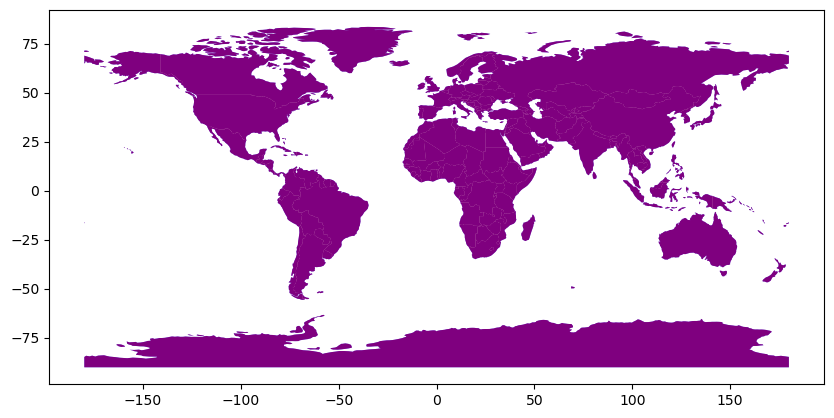

In [ ]:
# Assuming we have a second GeoDataFrame `gdf2`
ax = gdf.plot(color='blue', figsize=(10, 10))
gdf.plot(ax=ax, color='red', alpha=0.5)
# Blue + Red = Purple

# Save the Plot

In [ ]:
gdf.plot(color='lightblue', edgecolor='black', alpha=0.5)
plt.savefig("geospatial_map.png")

# Full Example

In [7]:
shapefile_path = 'ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'

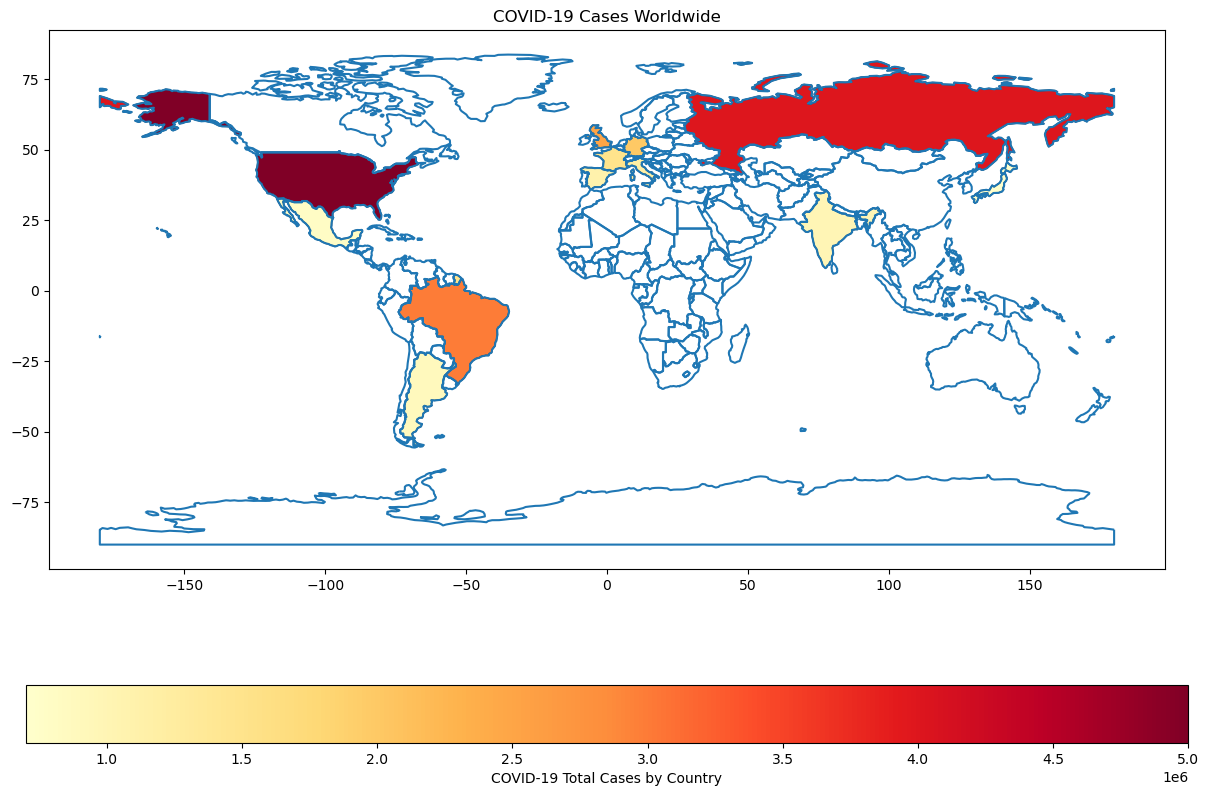

In [ ]:
# Example COVID-19 data for multiple countries (use real data in practice)
covid_data = {
    'India': 1000000,  # Example data: total cases in India
    'USA': 5000000,    # Example data: total cases in the USA
    'Brazil': 3000000,  # Example data: total cases in Brazil
    'Russia': 4000000,  # Example data: total cases in Russia
    'Germany': 2000000, # Example data: total cases in Germany
    'France': 1500000,  # Example data: total cases in France
    'UK': 2500000,      # Example data: total cases in the UK
    'Italy': 1200000,   # Example data: total cases in Italy
    'Mexico': 800000,   # Example data: total cases in Mexico
    'Spain': 1100000,   # Example data: total cases in Spain
    'Argentina': 900000,# Example data: total cases in Argentina
    'Japan': 700000,    # Example data: total cases in Japan
    # Add more countries as needed...
}

# Load the shapefile using GeoPandas
world = gpd.read_file(shapefile_path)

# Ensure that the country names in the shapefile match the ones in the COVID data
# Check for name discrepancies (sometimes the names in the shapefile may differ slightly)
world['NAME'] = world['NAME'].replace({
    'United States of America': 'USA',
    'United Kingdom': 'UK',
    'Russia Federation': 'Russia',
    'Korea, South': 'South Korea',
    # Add other replacements as needed
})

# Add a new column to the GeoDataFrame for the COVID-19 cases
world['covid_cases'] = world['NAME'].map(covid_data)

# Plot the map with COVID-19 data
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='covid_cases', ax=ax, legend=True,
           legend_kwds={'label': "COVID-19 Total Cases by Country",
                        'orientation': "horizontal"},
           cmap='YlOrRd', edgecolor='k')

# Set the title and show the plot
ax.set_title('COVID-19 Cases Worldwide')
plt.show()